# Setup

## Imports

In [1]:
# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import sys
import os
import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import utilities
from utils import setuputil, trainutil, inferutil
from classes.models import SimpleGeluEmbed

# Reload the necessary modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(SimpleGeluEmbed)

# Import the required utils
from utils.setuputil import setup_config, display_config
from utils.trainutil import train_model
from utils.inferutil import infer_one, infer_full

# Import the SimpleGeluEmbedAdd class
from classes.models.SimpleGeluEmbed import SimpleGeluEmbedAdd

## Config Setup

In [2]:
# Define the input configuration for the simple model
input_config = {
    # Environment and Model Info
    "env": "gcp",                
    "approach": "simple",         
    "model_name": "SimpleGeluEmbedAdd",
    
    # System Configuration
    "device": "cuda:0",
    "threads": 12,
    "seed": 42,
    
    # Data Configuration
    "data_dir": "../../data/farzan",
    "data_ds": "manual",
    
    # Model Parameters
    "rows": 100,
    "cols": 100,
    "tokens": 32,
    
    # Vocabulary Parameters
    "vocab_size": 150000,
    "vocab_space": True,
    "vocab_case": "both",
    
    # Training Parameters
    "batch": 40,
    "lr": 5e-3,
    "mu": 0.25,
    "epochs": 20,
    "patience": 2,
    "save_int": 10,
    "save_dir": '../models/'
}

# Setup the configuration using setuputil and display it
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
# System variables
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
spreadsheet_vocab = config["vocab"]
spreadsheet_wvs = config["wvs"]

# Training parameters
batch_size = config["batch"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]


Getting Vocab: 100%|███████████████████████████████████████████████████████████████████████████████| 40/40 [00:03<00:00, 12.94it/s]


40(P) = 40(G) + 0(E)
Unique Tokens: 5593
Vocab Size: 5597


Creating Word Embeddings: 100%|█████████████████████████████████████████████████████████████| 5597/5597 [00:00<00:00, 73052.12it/s]


Word Embeddings Shape: torch.Size([5597, 50])


Processing files: 100%|████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 26.70it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 5964.60it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 4874.83it/s]



5(P) = 5(G) + 0(E)

Configuration for SIMPLE approach:
{
  "env": "gcp",
  "approach": "simple",
  "model_base": "glove50",
  "model_name": "SimpleGeluEmbedAdd",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "DEVICE": "cuda:0",
  "THREADS": 12,
  "seed": 42,
  "data_ds": "manual",
  "data_dir": "../../data/farzan",
  "train_dir": "../../data/farzan/manual_train",
  "val_dir": "../../data/farzan/manual_val",
  "test_dir": "../../data/farzan/manual_test",
  "vocab_size": 5597,
  "vocab_space": true,
  "vocab_case": "both",
  "vocab": "<Vocab Object>",
  "wvs": "<Embedding Matrix>",
  "train_loader": "<LoaderSimple Object>",
  "val_loader": "<LoaderSimple Object>",
  "test_loader": "<LoaderSimple Object>",
  "batch": 40,
  "lr": 0.005,
  "mu": 0.25,
  "epochs": 20,
  "patience": 2,
  "save_int": 10,
  "save_dir": "../models/",
  "save_name": "gsim42_SimpleGeluEmbedAdd_manual_100x100x32_bSp5k_bsz40lr5e-3ep20pa2"
}


# Model Training

## Define the model

In [3]:
# Define the untrained model and move it to the device
untrained_model = SimpleGeluEmbedAdd(spreadsheet_wvs).to(DEVICE)
print(untrained_model)

SimpleGeluEmbedAdd(
  (_embed): Embedding(5597, 50)
  (_drop): Dropout(p=0.05, inplace=False)
  (_non_linear): GELU(approximate='none')
  (_pred): Linear(in_features=50, out_features=1, bias=True)
)


## Train the Model

In [4]:
trained_model = train_model(
    model=untrained_model,
    train_data=train_loader, 
    val_data=val_loader, 
    DEVICE=DEVICE, 
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config
)

Epoch 0


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 16.77922248840332, Perplexity: 1.0001678063027868
Val Loss: 13.174574851989746, Perplexity: 1.0001317544273722


Epoch 1


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 13.198573112487793, Perplexity: 1.0001319944416247
Val Loss: 10.650497436523438, Perplexity: 1.0001065106462215


Epoch 2


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.58s/it]


Train Loss: 10.703875541687012, Perplexity: 1.0001070444842688
Val Loss: 8.597784996032715, Perplexity: 1.0000859815461616


Epoch 3


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 8.689652442932129, Perplexity: 1.0000869003000417
Val Loss: 6.828039646148682, Perplexity: 1.0000682827276208


Epoch 4


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.64s/it]


Train Loss: 7.00277853012085, Perplexity: 1.0000700302373038
Val Loss: 5.260221004486084, Perplexity: 1.0000526035935653


Epoch 5


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.62s/it]


Train Loss: 5.575323581695557, Perplexity: 1.0000557547900575
Val Loss: 3.86038875579834, Perplexity: 1.0000386046326977


Epoch 6


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.88s/it]


Train Loss: 4.357285499572754, Perplexity: 1.0000435738043063
Val Loss: 2.6428897380828857, Perplexity: 1.0000264292466272


Epoch 7


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.58s/it]


Train Loss: 3.3368630409240723, Perplexity: 1.0000333691871481
Val Loss: 1.7102792263031006, Perplexity: 1.0000171029385165


Epoch 8


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 2.606349229812622, Perplexity: 1.0000260638319538
Val Loss: 1.2185460329055786, Perplexity: 1.000012185534572


Epoch 9


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.58s/it]


Train Loss: 2.2160720825195312, Perplexity: 1.0000221609663758
Val Loss: 1.2081780433654785, Perplexity: 1.0000120818534186

Model Saved

Epoch 10


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.57s/it]


Train Loss: 2.147763252258301, Perplexity: 1.0000214778631686
Val Loss: 1.2080944776535034, Perplexity: 1.0000120810177515


Epoch 11


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.63s/it]


Train Loss: 2.1558573246002197, Perplexity: 1.0000215588056338
Val Loss: 1.1734174489974976, Perplexity: 1.0000117342433357


Epoch 12


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.60s/it]


Train Loss: 2.1178903579711914, Perplexity: 1.0000211791278544
Val Loss: 1.187491536140442, Perplexity: 1.0000118749858684


Epoch 13


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.60s/it]


Train Loss: 2.110175609588623, Perplexity: 1.0000211019787395
Val Loss: 1.1542719602584839, Perplexity: 1.00001154278622


Epoch 14


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.58s/it]


Train Loss: 2.0731422901153564, Perplexity: 1.0000207316377985
Val Loss: 1.1546235084533691, Perplexity: 1.0000115463017425


Epoch 15


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 2.0932068824768066, Perplexity: 1.0000209322879021
Val Loss: 1.1450666189193726, Perplexity: 1.0000114507317484


Epoch 16


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 2.004824161529541, Perplexity: 1.0000200484425827
Val Loss: 1.135858416557312, Perplexity: 1.0000113586486745


Epoch 17


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.58s/it]


Train Loss: 1.9820971488952637, Perplexity: 1.0000198211679256
Val Loss: 1.1346720457077026, Perplexity: 1.0000113467848313


Epoch 18


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.58s/it]


Train Loss: 1.9821546077728271, Perplexity: 1.0000198217425258
Val Loss: 1.1202579736709595, Perplexity: 1.0000112026424859


Epoch 19


Validation Processing: 100%|█████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]

Train Loss: 1.9654678106307983, Perplexity: 1.0000196548712608
Val Loss: 1.1263759136199951, Perplexity: 1.0000112638225727

Model Saved


TRAINING DONE at epoch 19, best epoch 18
Train Loss = 1.9821546077728271, Perplexity = 1.0000198217425258
Val Loss = 1.1202579736709595, Perplexity = 1.0000112026424859


# Evaluation

In [7]:
# Define params for evaluation
thresh = 0.7
loc = 0
cond = '>'
disp_max=True

## Single Example


Filename: ../../data/farzan/manual_train/Harassment-Bullying-on-basis-of-race_reported.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(5,4): 0.16367882490158081055
(5,22): 0.16689391434192657471
(4,11): 0.17044444382190704346
(3,1): 0.24173274636268615723
(5,18): 0.31845879554748535156
(3,2): 0.32131403684616088867
(4,5): 0.34439924359321594238
(5,3): 0.38493365049362182617
(3,3): 0.44444575905799865723
(3,21): 0.57120513916015625000
(4,3): 0.70219075679779052734
(3,23): 0.71446216106414794922
(4,9): 0.73193138837814331055
(3,24): 0.74539154767990112305
(4,15): 0.75613766908645629883
(4,7): 0.91727668046951293945
(4,13): 0.91729503870010375977
(3,17): 0.92181450128555297852
(3,19): 0.96602338552474975586
(6,1): 0.97601413726806640625
(1,1): 0.99850165843963623047

NB to B ratio: Predicted = 9853:147 | Actual = 9930:70
Accuracy: 98.31% | Precision: 16.33% | Recall: 34.29% | F1-Score: 0.22



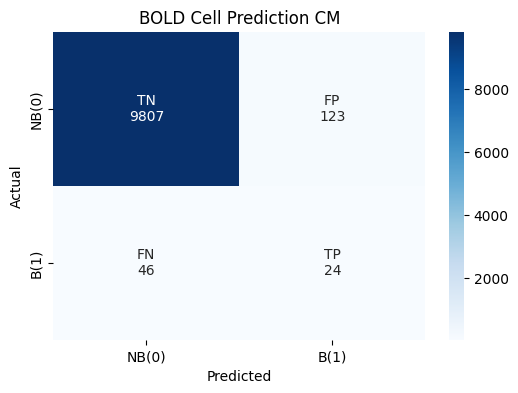


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1
4,0,0,0,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Filename: ../../data/farzan/manual_val/advanced-placement-mathematics-enrollment.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(5,4): 0.16367882490158081055
(5,18): 0.16689391434192657471
(4,11): 0.17044444382190704346
(3,1): 0.24173274636268615723
(3,2): 0.32131403684616088867
(4,5): 0.34439924359321594238
(5,3): 0.38493365049362182617
(3,3): 0.44444575905799865723
(3,19): 0.57120513916015625000
(4,3): 0.70219075679779052734
(3,21): 0.71446216106414794922
(4,9): 0.73193138837814331055
(3,22): 0.74539154767990112305
(4,15): 0.75613766908645629883
(4,7): 0.91727668046951293945
(4,13): 0.91729503870010375977
(3,17): 0.96100246906280517578
(1,1): 0.99463790655136108398

NB to B ratio: Predicted = 9862:138 | Actual = 9937:63
Accuracy: 98.37% | Precision: 13.77% | Recall: 30.16% | F1-Score: 0.19



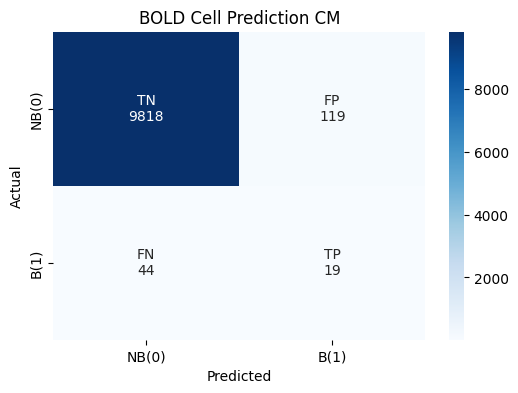


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1
4,0,0,0,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0



Filename: ../../data/farzan/manual_test/dlportfolio-by-school-type.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(9,1): 0.17747806012630462646
(6,1): 0.19553539156913757324
(19,0): 0.21580936014652252197
(4,8): 0.23816104233264923096
(11,0): 0.25133809447288513184
(7,0): 0.25185838341712951660
(8,1): 0.25756564736366271973
(6,0): 0.26673159003257751465
(15,0): 0.26837605237960815430
(4,2): 0.27123448252677917480
(4,10): 0.27845117449760437012
(4,4): 0.32869139313697814941
(7,1): 0.37771677970886230469
(4,6): 0.39676377177238464355
(5,0): 0.49236363172531127930
(0,0): 0.95601463317871093750
(5,3): 0.95961004495620727539
(5,2): 0.99640274047851562500
(5,4): 0.99693977832794189453

NB to B ratio: Predicted = 9941:59 | Actual = 9936:64
Accuracy: 99.21% | Precision: 37.29% | Recall: 34.38% | F1-Score: 0.36



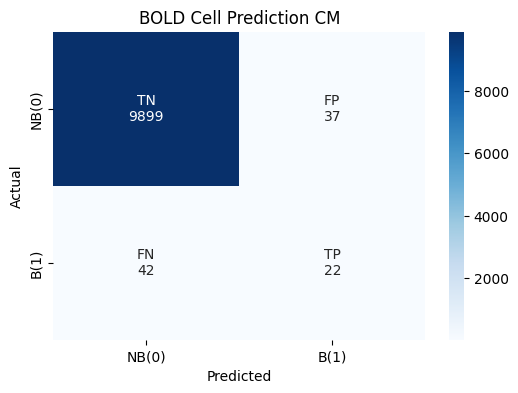


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1
22,1,1,1,1,1,1,1,1,1,1,1,1
23,1,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0


In [8]:
# Check with single example
infer_one(trained_model, train_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)
infer_one(trained_model, val_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)
infer_one(trained_model, test_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)

## All Examples

Batch Inference: 100%|███████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.04s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 395657:4343 | Actual = 396714:3286
Accuracy: 98.67% | Precision: 26.80% | Recall: 35.42% | F1-Score: 0.31



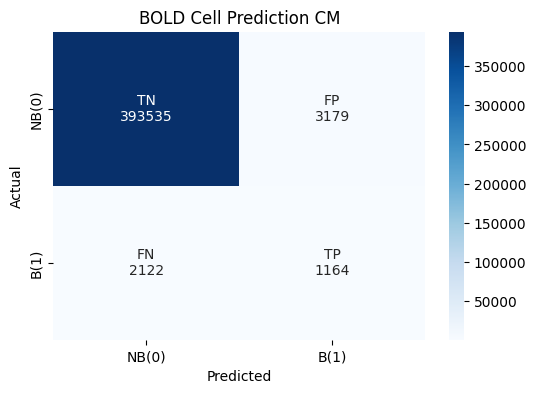

In [9]:
# Evaluate the model on all train files
infer_full(trained_model, train_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)

Batch Inference: 100%|███████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.62s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49425:575 | Actual = 49602:398
Accuracy: 98.61% | Precision: 24.00% | Recall: 34.67% | F1-Score: 0.28



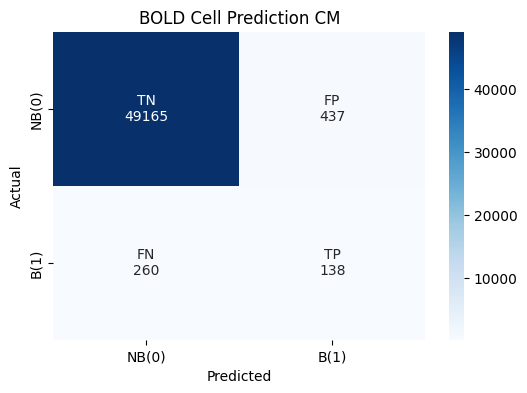

In [10]:
# All val files
infer_full(trained_model, val_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)

Batch Inference: 100%|███████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.61s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49445:555 | Actual = 49606:394
Accuracy: 98.63% | Precision: 23.78% | Recall: 33.50% | F1-Score: 0.28



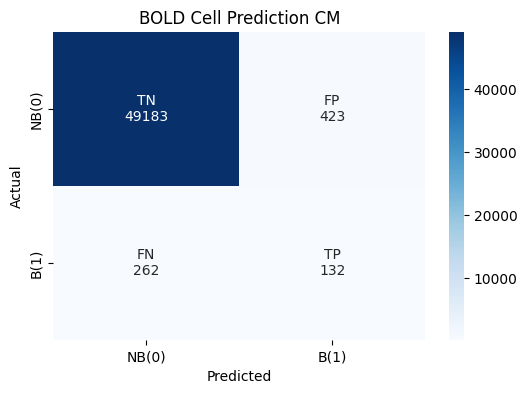

In [11]:
# All test files
infer_full(trained_model, test_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)